In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import os

from src.utils import read_yaml

In [10]:
def get_exp_results(exp_id):

    exp_folder = f'experiments/{exp_id}'

    cfg = read_yaml(exp_folder + '/config.yaml')
    result_df = pd.read_csv(exp_folder + '/result.csv')

    return cfg, result_df

In [12]:
params = ['n_actions', 'dim_context', 'dim_context_unobserved', 'dim_action', 'dim_action_unobserved']

results_dfs = []
for exp_id in os.listdir('experiments'):

    cfg_, result_df_ = get_exp_results(exp_id)

    for param in params:
        result_df_[param] = cfg_[param]

    results_dfs.append(result_df_)

results_df = pd.concat(results_dfs)

In [18]:
fixed_params = {
    'dim_context': 5,
    'dim_context_unobserved': 0,
    'dim_action': 5,
    'dim_action_unobserved': 0
}

results_df_1 = results_df.copy()

for k, v in fixed_params.items():
    results_df_1 = results_df_1[results_df_1[k] == v]

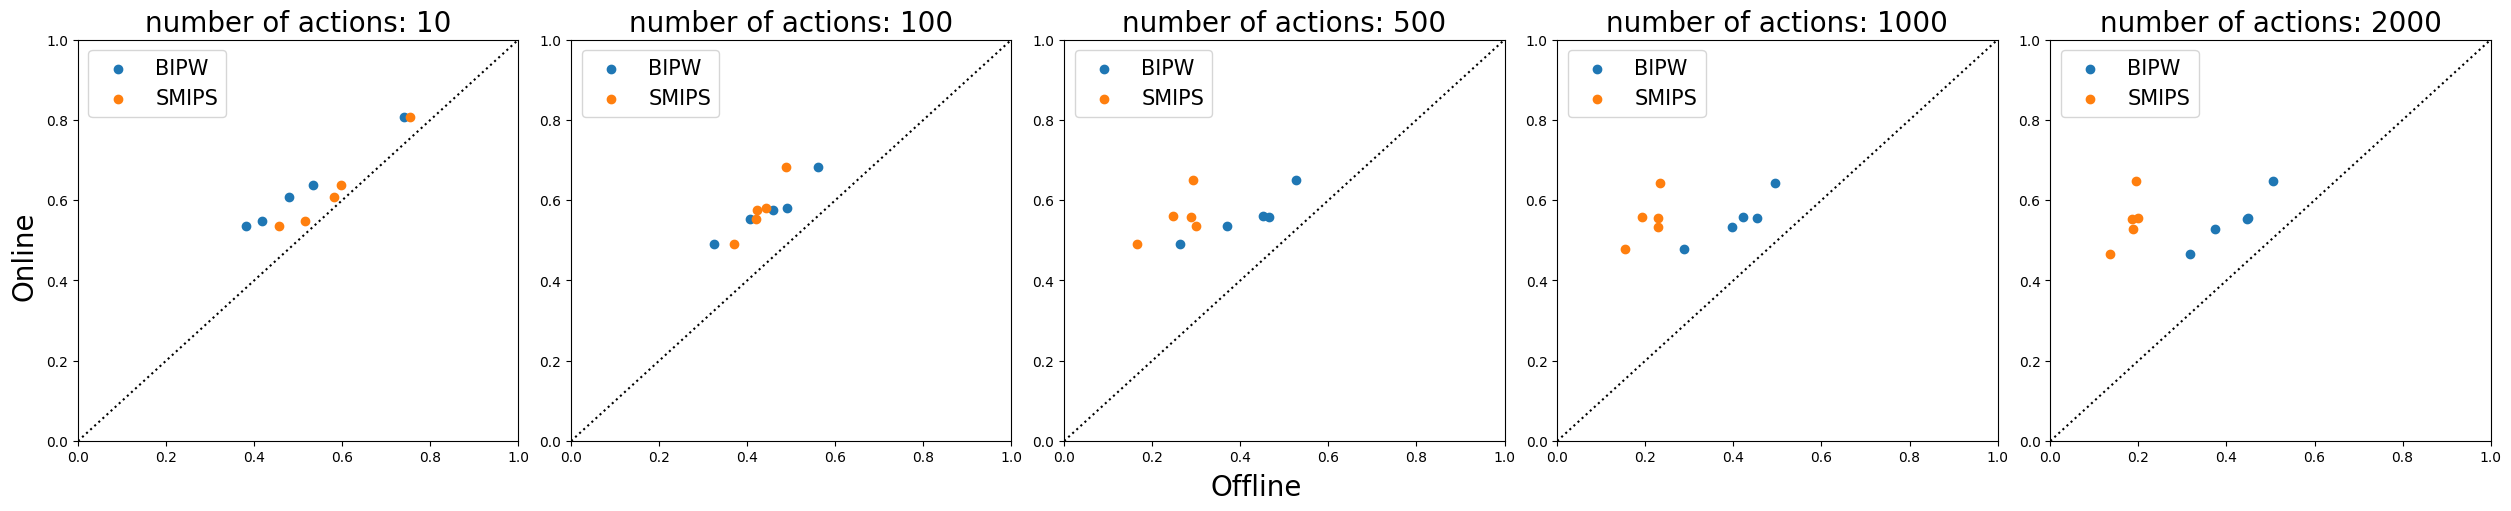

In [68]:
results_df_1_grouped = results_df_1.groupby(['policy', 'n_actions']).mean().reset_index()

est2plot = ['BIPW', 'SMIPS']
colors = ['r', 'b']

n_actions = sorted(results_df_1['n_actions'].unique())


fig, axs = plt.subplots(1, len(n_actions), figsize=(5*len(n_actions), 5), constrained_layout=True)

for i, n_action in enumerate(n_actions):
    dft = results_df_1_grouped[results_df_1_grouped['n_actions'] == n_action]
    axs[i].plot([0,1], [0,1], ':', c='k')
    for est in est2plot:
        axs[i].scatter(dft[est], dft['true_val'], label=est) #, c=colors[i])
    axs[i].set_xlim(0,1)
    axs[i].set_ylim(0,1)
    axs[i].set_title(f'number of actions: {n_action}', fontsize=20)
    axs[i].legend(fontsize=15)

fig.supxlabel('Offline', fontsize=20)
fig.supylabel('Online', fontsize=20)
plt.show()


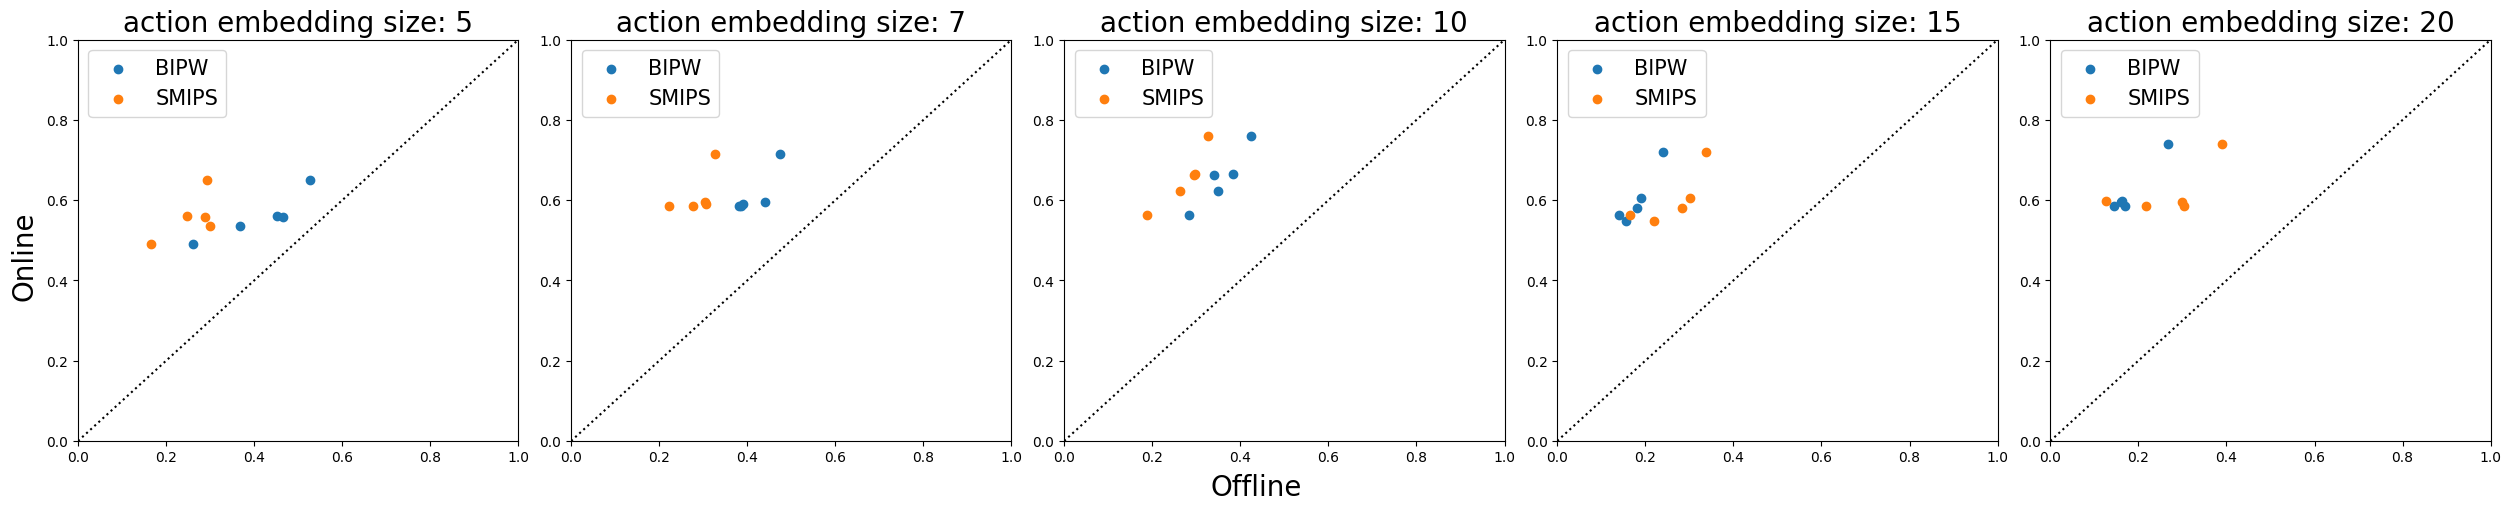

In [69]:
fixed_params = {
    'n_actions': 500,
    'dim_context': 5,
    'dim_context_unobserved': 0,
    'dim_action_unobserved': 0
}

results_df_2 = results_df.copy()

for k, v in fixed_params.items():
    results_df_2 = results_df_2[results_df_2[k] == v]


results_df_2_grouped = results_df_2.groupby(['policy', 'dim_action']).mean().reset_index()

est2plot = ['BIPW', 'SMIPS']
colors = ['r', 'b']

dim_actions = sorted(results_df_2_grouped['dim_action'].unique())


fig, axs = plt.subplots(1, len(dim_actions), figsize=(5*len(dim_actions), 5), constrained_layout=True)

for i, dim_action in enumerate(dim_actions):
    dft = results_df_2_grouped[results_df_2_grouped['dim_action'] == dim_action]
    axs[i].plot([0,1], [0,1], ':', c='k')
    for est in est2plot:
        axs[i].scatter(dft[est], dft['true_val'], label=est) #, c=colors[i])
    axs[i].set_xlim(0,1)
    axs[i].set_ylim(0,1)
    axs[i].set_title(f'action embedding size: {dim_action}', fontsize=20)
    axs[i].legend(fontsize=15)

fig.supxlabel('Offline', fontsize=20)
fig.supylabel('Online', fontsize=20)
plt.show()


In [53]:
sorted(results_df_2['dim_action'].unique())

[5, 7, 10, 15, 20]

[]

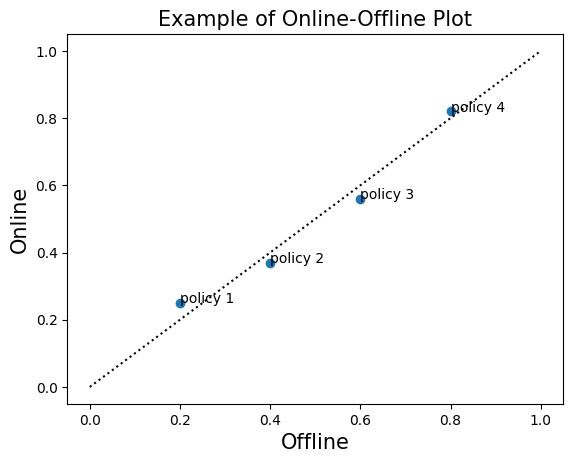

In [79]:
x = [0.2, 0.4, 0.6, 0.8]
y = [0.25, 0.37, 0.56, 0.82]
n = ['policy 1', 'policy 2', 'policy 3', 'policy 4']

plt.plot([0,1], [0,1], ':', c='k')
plt.scatter(x, y)

for i, txt in enumerate(n):
    plt.annotate(txt, (x[i], y[i]), fontsize=10)

plt.xlabel('Offline', fontsize=15)
plt.ylabel('Online', fontsize=15)
plt.title('Example of Online-Offline Plot', fontsize=15)
plt.plot()